# Homework 7: 

**DUE:** 5pm EST, April 30, 2020

### **Conceptual:** Short answer questions. Be concise

---

1. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in class and the _ILSR_ Chapter 8. The second approach is to classify based on the average probability. What is the final classification under each of these two approaches? What does the difference in classification aggregation (if any) tell us about tree approaches?

**Answer:**
- If the classification threshold is 0.5, then 4 (green) < 6 (red), so the X will be classified to red.
- However, the average probability is less than 0.5, so so the X will be classified to green.
<br> So the data itself and how to make the threshold is important </br>

---
2. Explain why out of bag (OOB) error provides a more reliable estimate of model test error than a more traditional hold out test set approach. 

**Answer:**
If we don't have a large dataset and want to consume it all as the training dataset, the OOB score provides a good trade-off since the OOB score is computed as the number of correctly predicted rows from the out of bag sample.

---

### **Applied:** Show your code & plots

We will use the HCP dataset for these problems. Include conceptual answers to questions as comments in code cells. You should use the tidyverse and class libraries for this assignment, as well as the data table for the HCP data set.

You will need to have the "tidyverse", "tree" and "randomForest" packages installed to answer these problems.


3. Use trees methods to predict unadjusted Flanker task (Flanker_Unadj) performance using a set of demographic, neural, and other cognitive factors. 


(a) Start by loading the HCP data and get a cleaned and tidy data table containing only Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol, WM_Task_Acc, ReadEng_Unadj, Language_Task_Acc, Dexterity_Unadj, PosAffect_Unadj, Relational_Task_Acc as our variables of interest.

In [1]:
# -------------------------------
# Question 3
# -------------------------------
df <- read.csv("hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv")
library(tidyverse)
# (a)
df <- df %>% select(Gender, Age, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol, WM_Task_Acc, ReadEng_Unadj, Language_Task_Acc, Dexterity_Unadj, PosAffect_Unadj, Relational_Task_Acc)%>% na.omit()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


(b) Fit a regression tree model with Flanker_Unadj as the response variable and all others as predictor variables. Prune your tree to find the best model fit using as few terminal nodes as possible and show that the model fit improves after pruning. Plot your tree, plot tree size versues model deviance, determine the test accuracy on a hold out test set, and show a pruned model performance.


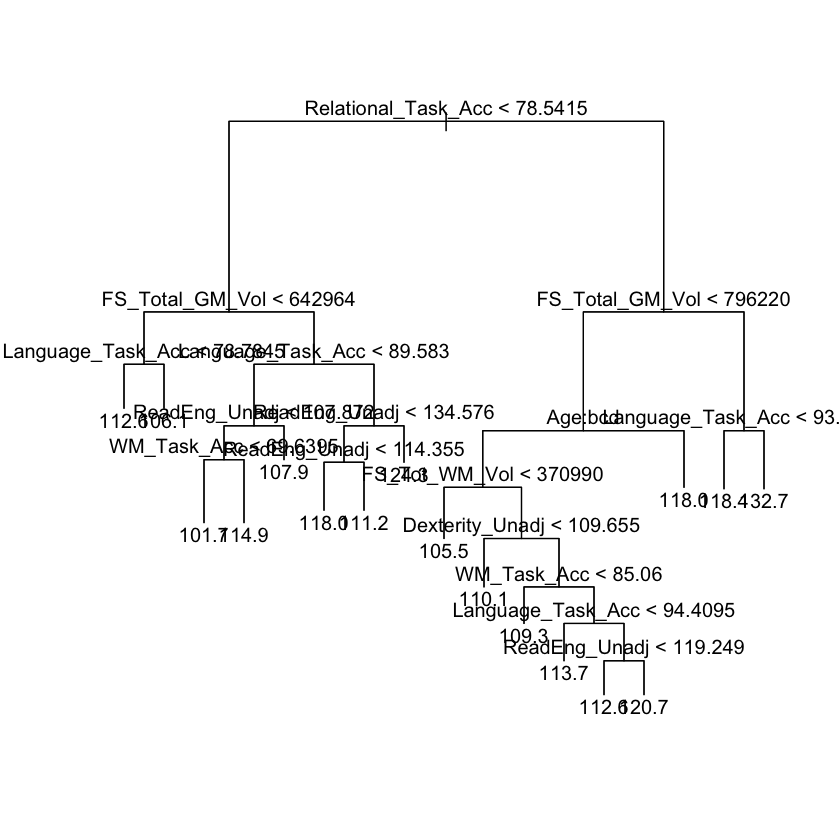

In [32]:
# (b)
#install.packages("tree")
library(tree)
split = nrow(df)/2
train_set = sample(1:nrow(df),split)
regression_t = tree(Flanker_Unadj~.,df, subset = train_set)
plot(regression_t)
text(regression_t)

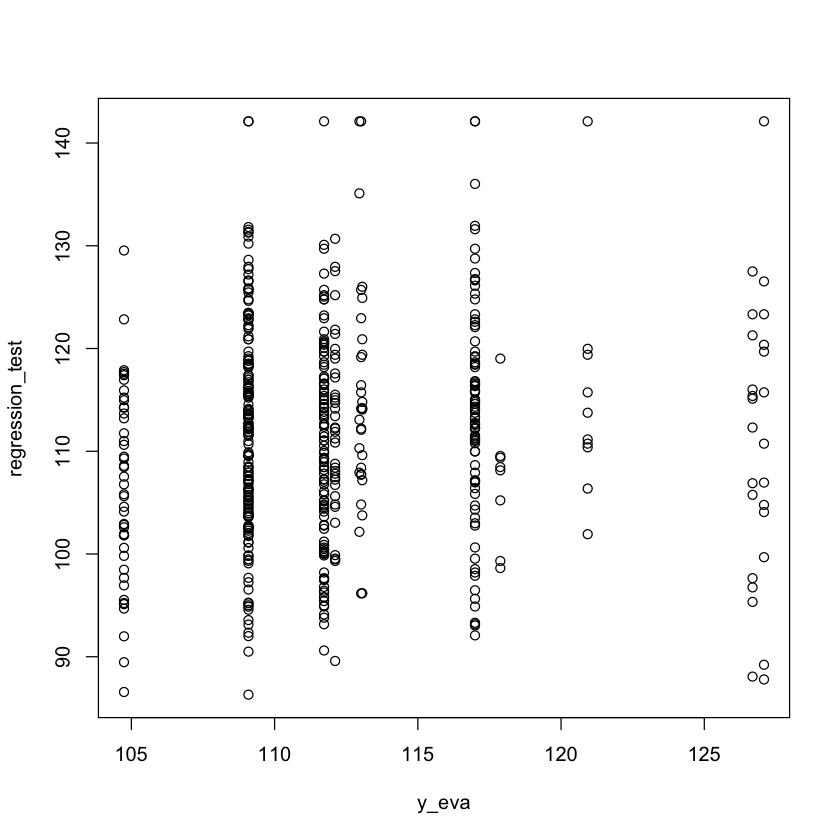

In [14]:
y_eva = predict(regression_t,df[-train_set,])
regression_test = df[-train_set,"Flanker_Unadj"]
plot(y_eva,regression_test)

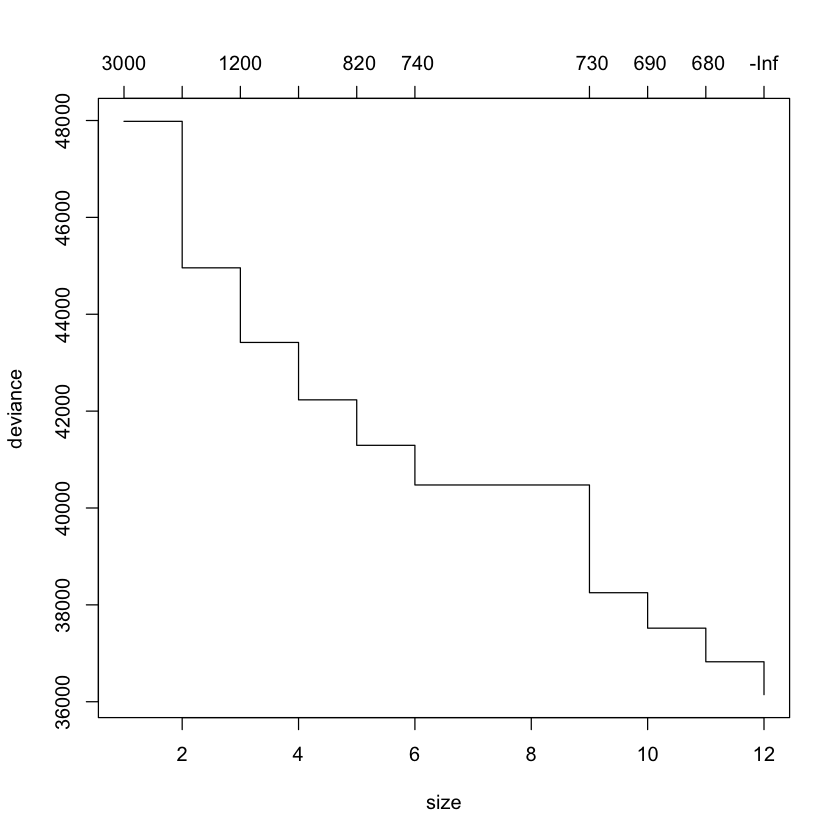

In [16]:
tree_prune = prune.tree(regression_t)
plot(tree_prune)

4. Use the same data table to fit a classification tree with gender as the response variable and all others as predictor variables. Prune your tree and find the best model fit using as few terminal nodes as possible, and show that your model fit improves after pruning. Evaluate your model using a hold out test sample.


In [30]:
# -------------------------------
# Question 4
# -------------------------------
gender_test = df[-train_set,-1]
gender_test_y = df[-train_set,"Gender"]
gender_tree = tree(Gender~.,df,subset=train_set)
gender_pred_y = predict(gender_tree,gender_test,type="class")
matrix = table(gender_pred_y,gender_test_y)
accuracy = sum(diag(matrix))/sum(matrix)
matrix
accuracy

             gender_test_y
gender_pred_y   F   M
            F 239  69
            M  45 167

[1] 0.7807692

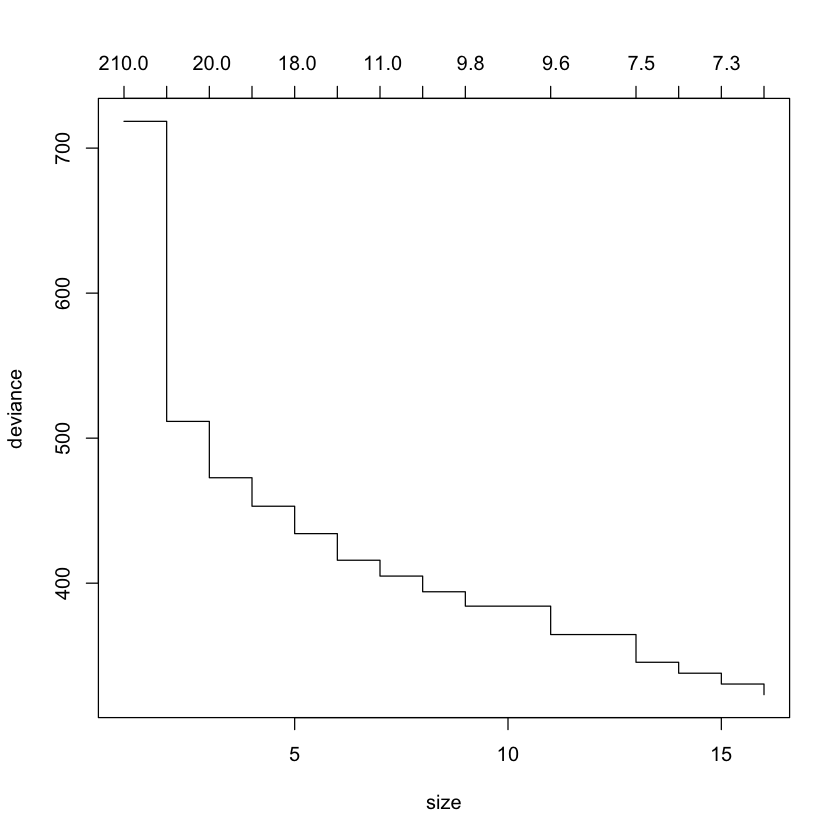

In [21]:
tree_prune = prune.tree(gender_tree)
plot(tree_prune)

5. Use the same data table to fit a random forest model for the classification task with m = 3 Check test accuracy and visualize feature importance for classfying gender.  

In [27]:
# -------------------------------
# Question 5
# -------------------------------
library(randomForest)
# m = mtry
RF = randomForest(Gender~.,df,subset = train_set, mtry = 3, importance = TRUE)
RF_pred = predict(RF,gender_test)
matrix = table(RF_pred,gender_test_y)
accuracy = sum(diag(matrix))/sum(matrix)
matrix
accuracy

       gender_test_y
RF_pred   F   M
      F 242  49
      M  42 187

[1] 0.825

,F,M,MeanDecreaseAccuracy,MeanDecreaseGini
Age,3.208586,5.6489986,5.958119,6.519013
Flanker_Unadj,5.252046,7.9701508,9.008832,21.002873
FS_Tot_WM_Vol,20.664029,16.0367647,26.672772,51.492576
FS_Total_GM_Vol,41.265903,34.8936628,53.129593,80.783714
WM_Task_Acc,2.488827,-0.9614135,1.282304,14.055675
ReadEng_Unadj,1.415381,3.6702919,3.689606,17.590148
Language_Task_Acc,2.454828,1.9400275,3.272049,13.121050
Dexterity_Unadj,11.083980,9.9741973,14.911244,23.467203
PosAffect_Unadj,1.571545,1.3428117,1.976075,14.361162
Relational_Task_Acc,1.484339,3.1032006,3.214291,16.151588


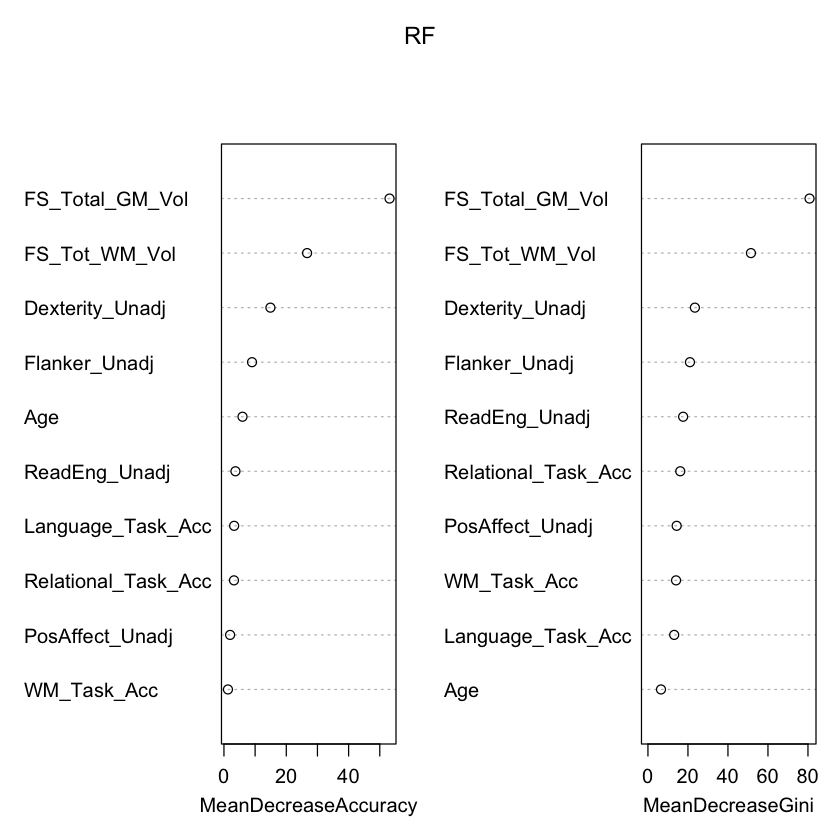

In [29]:
importance(RF)
varImpPlot(RF)